In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [67]:
df = pd.read_excel('sales.xlsx')
df_original = pd.read_excel('sales.xlsx')

In [4]:
df.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

## Data Featuring


J'ai pris la décision de drop les colonnes quantity et total_price dans la mesure où il y'a d'autres moyens de récupérer ces informations par des groupby et qu'elles ajoutent une complexité algorythmique à répéter dans plus de 50% des réponses de l'énoncé pour avoir accès à toutes les pizzas lors de calculs.

C'est avant tout un notebook de data_exploration, donc faciliter son exploitation est important.

On conserve deux constante pratique pour vérifier la performance de la démarche

In [8]:
#avoid repeated process errors
if 'quantity' in df.columns:
    QUANTITY = df.quantity.sum()
    TOTALMONEY = df.total_price.sum()

On transforme la colonne quantité du df en rows supplémentaire (1 colonnes en moins et on a désormais 900 rows 
supplémentaires, on atteint donc 49574) et on supprime les colonnes indésirables

In [9]:
#ensuring it only happens once when running notebook
if 'quantity' in df.columns:
    df = df.loc[df.index.repeat(df['quantity'])].reset_index(drop=True)
    df.drop(columns=['quantity', 'total_price'], inplace=True)

# Questions

## 2. Informations de base :

a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
données ?

In [10]:
df.pizza_id.value_counts().count()

91

b.  Combien de commandes uniques (order_id distincts) figurent dans le jeu
de données ?

In [11]:
df.order_id.value_counts().count()

21350

## 3. Analyse temporelle :

a. Quelle est la plage de dates dans le jeu de données ?

In [12]:
print(f"plage de dates : {df['order_date'].min()} à {df['order_date'].max()}")

plage de dates : 2015-01-01 00:00:00 à 2015-12-31 00:00:00


b. Combien de commandes ont été passées chaque jour ?

## ------------------------------------------------------------

In [13]:
df.groupby('order_date')['order_id'].nunique()

order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64

c. Quelle est la durée moyenne pour traiter une commande ?

C'est une question piège nous n'avons aucun moyen de calculer correctement cette valeur, il faudrait que le Dataframe contienne une colonne order_processed ou autre pour pouvoir faire ce calcul.

Une très mauvaise solution serait de calculer la différence de temps passée entre chaque commandes triées par order_id (1 et 2 par ex) pour essayer de trouver cette valeur. Cela ne serait pas très pertinent car les résultats ne seront pas nécessairement représentatif du temps que Jo va prendre pour traiter une commande, et si il prend une pause, qu'il n'a pas de clients pendant un moment ou ferme la pizzaria après une commande, le calcul va considérer cela comme du temps de préparation de la commande et fausser les résultats

## 4. Analyse de la quantité :

a. Quelle est la quantité moyenne de pizzas commandées ?

In [14]:
df.groupby('order_id')['order_id'].count().mean()

2.321967213114754

b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [15]:
df.pizza_size.value_counts().to_frame().reset_index()
# df.groupby(['pizza_size'])['quantity'].count()

,pizza_size,count
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


In [16]:
# validation check
QUANTITY == df.pizza_size.value_counts().to_frame().reset_index()['count'].sum()

True

c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [17]:
df.pizza_category.value_counts()

pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: count, dtype: int64

In [18]:
df.pizza_category.value_counts().index[0]

'Classic'

## 5. Analyse des prix :

a. Quel est le prix unitaire moyen des pizzas ?

In [19]:
df.unit_price.mean().round(2)
#quantity


16.5

b. Quel est le prix total moyen d'une commande ?

In [20]:
df.groupby('order_id')['unit_price'].sum().mean().round(2)

38.31

c. Quelle pizza a le prix unitaire le plus élevé ?

In [21]:
# Je vérifies d'abord qu'il y a bien une seule pizza qui à le prix le plus élevé
df[df.unit_price == df.unit_price.max()]['pizza_id'].value_counts().count()

# ceci donne le bon nom de pizza mais on peut faire un peu mieux (case en dessous)
# df[df.unit_price == df.unit_price.max()]['pizza_name'].value_counts()[0]

1

In [22]:
# plus fluide :
df[df.unit_price == df.unit_price.max()].iloc[0]['pizza_id']

'the_greek_xxl'

## 6. Répartition par taille et catégorie :

a. Combien de pizzas de chaque taille ont été vendues ?

In [23]:
df.groupby('pizza_size').size()

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
dtype: int64

In [24]:
# validity_check
QUANTITY == df.groupby('pizza_size').size().sum()

True

b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [25]:
df.groupby('pizza_category')['pizza_name'].nunique()

pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64

## 7. Analyse des ingrédients :

a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
pizzas ?


In [26]:
# avoiding repeating operation error by checking if last element of the
# column has already been converted to a list instead of string
if not isinstance(df.pizza_ingredients[df.pizza_ingredients.shape[0]-1], list):
    # cleaning list of ingredients
    df.pizza_ingredients = df.pizza_ingredients.apply(lambda x : x.split(', '))
df.pizza_ingredients.explode().value_counts().to_frame()


,count
pizza_ingredients,
Garlic,27913
Tomatoes,27052
Red Onions,19834
Red Peppers,16562
Mozzarella Cheese,10569
...,...
Brie Carre Cheese,490
Prosciutto,490
Caramelized Onions,490


b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
pepperoni, champignons) ?

In [27]:
# Just making sure df_filtered
df_filtered = df.drop_duplicates(subset='pizza_ingredients')

In [58]:
# Pour une raison étrange il faut activer 2 fois celle cellules pour ne pas reçevoir l'avertissement de non utilisation du .loc
# je n'ai pas déterminé la source du problème malgré l'addition du .loc
ingredient = 'Garlic'

df_filtered.loc[:,'ingredient_count'] = df_filtered.loc[:,('pizza_ingredients')].apply(lambda x: x.count(ingredient) if isinstance(x, list) else 0)
df_filtered.groupby('pizza_category')['ingredient_count'].sum().reset_index()


,pizza_category,ingredient_count
0,Chicken,2
1,Classic,3
2,Supreme,8
3,Veggie,7


## 8. Détails de la commande :

a. Quelle est la répartition du nombre de pizzas par commande ?

In [29]:
df.groupby('order_id').size()

order_id
1        1
2        5
3        2
4        1
5        1
        ..
21346    4
21347    4
21348    3
21349    1
21350    1
Length: 21350, dtype: int64

In [30]:
print(len(df[df.order_id == 18845]))
df.groupby('order_id').size()[df.groupby('order_id').size() == 28]

28


order_id
18845    28
dtype: int64

In [31]:
df.order_id.nunique()

21350

In [32]:
df.groupby('order_id').size().value_counts()

1     8111
2     6152
3     3207
4     3122
5      145
6       80
8       67
14      66
9       64
7       61
15      57
10      56
11      56
12      54
13      50
25       1
28       1
Name: count, dtype: int64

In [62]:
# df.groupby('order_id').size().value_counts().to_frame()
temp_df = df.groupby('order_id').size().value_counts().to_frame().reset_index().rename(columns={'index': 'pizzas_per_order'})
temp_df

,pizzas_per_order,count
0,1,8111
1,2,6152
2,3,3207
3,4,3122
4,5,145
5,6,80
6,8,67
7,14,66
8,9,64
9,7,61


In [63]:
temp_df.pizzas_per_order*temp_df['count']
# QUANTITY ==

0      8111
1     12304
2      9621
3     12488
4       725
5       480
6       536
7       924
8       576
9       427
10      855
11      560
12      616
13      648
14      650
15       25
16       28
dtype: int64

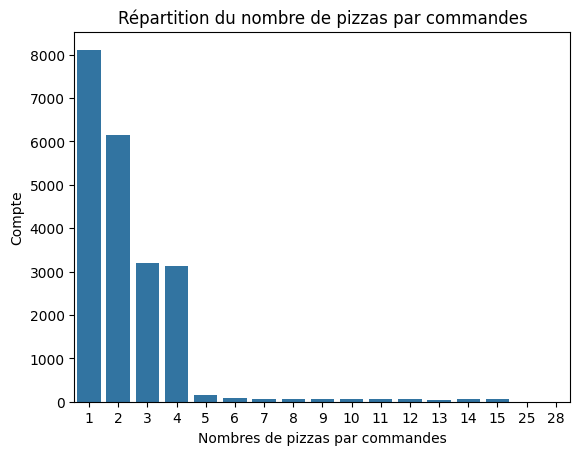

In [64]:
sns.barplot(x=temp_df.pizzas_per_order, y=temp_df['count'], data=df)
plt.xlabel('Nombres de pizzas par commandes')
plt.ylabel('Compte')
plt.title('Répartition du nombre de pizzas par commandes')
plt.show()

b. Quelle est la répartition des prix totaux pour les commandes ?

In [36]:
# Pour illustrer ma démarche initiale de modification du dataframe
# Dans ce scénario également sans la décomposition du dataframe la question devient largement plus complexe à traiter
print(f"prix le plus élevé dépense lors d'une commande {df.groupby(['order_id'])['unit_price'].sum().max()}")


# Avec la formule df.groupby(['order_id','quantity'])['total_price'].sum().max() on aurait trouvé 282.65 soit
print(f"Différence notable de {df.groupby(['order_id'])['unit_price'].sum().max()-282.5}")

prix le plus élevé dépense lors d'une commande 444.2
Différence notable de 161.7


In [37]:
# Il s'agit bien sûr de l'unique commande à 28 pizzas
df[df.order_id == 18845].unit_price.sum()

444.2

<Axes: xlabel='unit_price', ylabel='Count'>

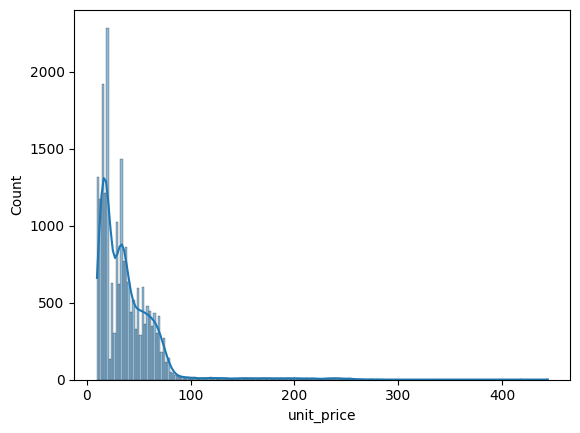

In [38]:
sns.histplot(df.groupby(['order_id'])['unit_price'].sum(), kde=True)


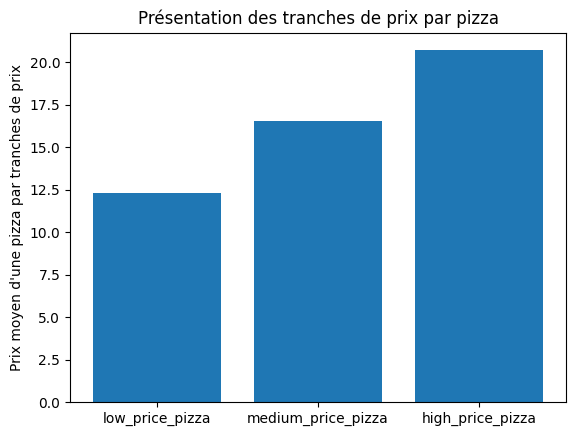

In [39]:
# Si cette donnée nous intéresse réellement, il me parait plus judicieux de classifier les commandes dans une nouvelle colonne
# par tranches de prix totaux des commandes. ici 3 choisit arbitrairement. 1/3 par catégorie.

df['total_price_quartile'] = pd.qcut(df['unit_price'], q=[0, 0.33,  0.66, 1],
    labels=['low_price_pizza', 'medium_price_pizza', 'high_price_pizza'])

temp_df_quarts = df.groupby('total_price_quartile')['unit_price'].mean().reset_index()
plt.bar(temp_df_quarts['total_price_quartile'], temp_df_quarts['unit_price'])
plt.ylabel('Prix moyen d\'une pizza par tranches de prix')
plt.title('Présentation des tranches de prix par pizza')
plt.show()


<Axes: xlabel='unit_price', ylabel='Count'>

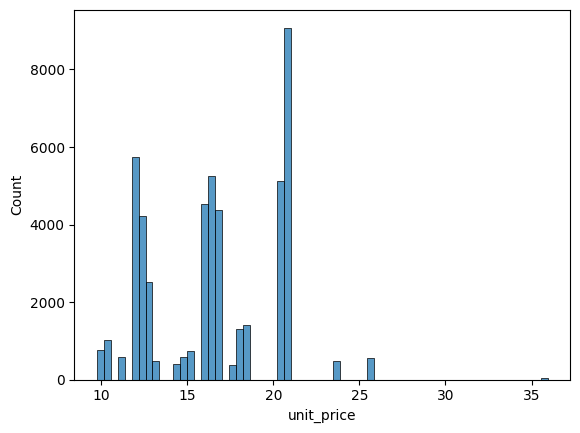

In [40]:
sns.histplot(df.unit_price)
#  need to add bins to this plots around prices ranges

In [41]:
df.unit_price.describe()

count    49574.000000
mean        16.497762
std          3.621954
min          9.750000
25%         12.750000
50%         16.500000
75%         20.250000
max         35.950000
Name: unit_price, dtype: float64

## 9. Analyse du chiffre d’affaires en fonction du temps :

a. Quel est le chiffre d'affaires quotidien ?


Chiffre d'affaires quotidien
(Le Dataset étant réparti sur une année complète)

In [66]:
# trie par jour nativement
# Cette commande est fausse si je n'avais pas démantelé la colonne quantity car elle n'aurait pas pris en compte toutes les pizzas
# commandées et aurait ignoré la multiplication de unit_price*quantity
# C'est un example parmi tant d'autres
df.groupby('order_date')['unit_price'].sum()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: unit_price, Length: 358, dtype: float64

Chiffre d'affaires quotidien moyen

In [43]:
df.groupby('order_date')['unit_price'].sum().mean()

2284.5252793296086

b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
commande ?

On réutilise la colonne order_price créée précédemment.

In [44]:
# avoiding repeat process errors
if df['order_time'].dtype != 'datetime64[ns]':
    df['order_time'] = pd.to_datetime(df['order_time'].astype(str), format='%H:%M:%S')

temp_df = df.groupby([pd.Grouper(key='order_time', freq='H')])['unit_price'].sum().reset_index()
temp_df['start_time'] = temp_df['order_time'].dt.strftime('%H')
temp_df['order_time_range'] = temp_df['start_time'] + '-' + (temp_df['order_time'] + pd.Timedelta(hours=1)).dt.strftime('%H') + 'h'


temp_df[['order_time_range', 'unit_price']]


,order_time_range,unit_price
0,09-10h,83.00
1,10-11h,303.65
2,11-12h,44935.80
3,12-13h,111877.90
4,13-14h,106065.70
5,14-15h,59201.40
6,15-16h,52992.30
7,16-17h,70055.40
8,17-18h,86237.45
9,18-19h,89296.85


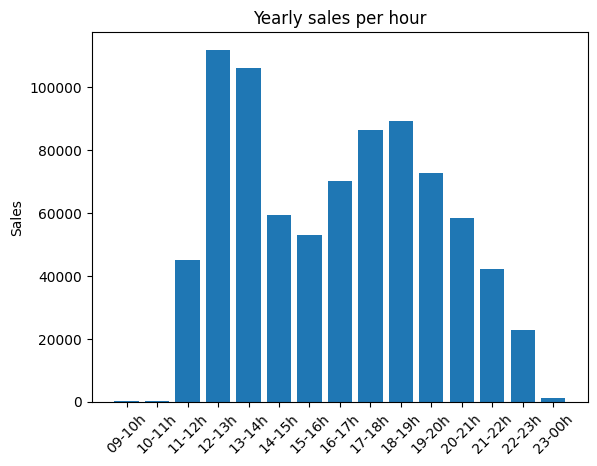

In [45]:

plt.bar(temp_df['order_time_range'], temp_df['unit_price'])
plt.ylabel('Sales')
plt.title('Yearly sales per hour')
plt.xticks(rotation=45)
plt.show()


## 10.Pizzas populaires :

a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [46]:
# sorting value again after filtering to get top value at the top
temp_serie = pd.Series(dict(df.groupby('pizza_id')['pizza_id'].count()))\
    .sort_values(ascending=False)[0:5].sort_values(ascending=True)

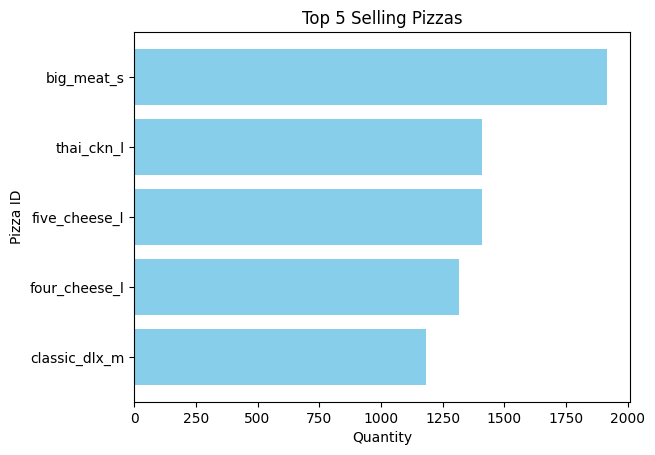

In [47]:
plt.barh(temp_serie.index, temp_serie.values, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Pizza ID')
plt.title('Top 5 Selling Pizzas')
plt.show()

b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
d'affaires ?

In [48]:
df.groupby('pizza_id')['unit_price'].sum().reset_index().sort_values(by='unit_price', ascending=False)\
    .reset_index().drop(columns='index')


,pizza_id,unit_price
0,thai_ckn_l,29257.50
1,five_cheese_l,26066.50
2,four_cheese_l,23622.20
3,spicy_ital_l,23011.75
4,big_meat_s,22968.00
...,...,...
86,mexicana_s,1944.00
87,green_garden_l,1923.75
88,ckn_alfredo_s,1224.00
89,calabrese_s,1212.75


## 11.Chiffre d'affaires par taille et catégorie :

a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [49]:
# trie par jour nativement
df.groupby('pizza_size')['unit_price'].sum()

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: unit_price, dtype: float64

b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de
pizza ?

In [50]:
# trie par jour nativement
df.groupby('pizza_category')['unit_price'].sum()

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: unit_price, dtype: float64

## 12.Corrélation entre prix et quantité :

a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

Le plus proche de 1, plus la corrélation est significante.
Dans ce cas précis, elle est assez insignifiante dans la mesure où la plupart des commandes ne contiennent qu'une fois la même pizza.

In [70]:
df_original.quantity.corr(df.unit_price).round(5)

0.00714

b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

La méthode à employée est bien plus simple avec la modification actuelle du df

In [52]:
df.groupby('pizza_size')['unit_price'].mean()


# df['pizza_size'] = pd.Categorical(df['pizza_size'], categories=['S', 'M', 'L', 'XL', 'XXL'],\
#     ordered=True)
# df.sort_values(by='pizza_size').groupby('pizza_size')['unit_price'].mean()


pizza_size
L      19.799467
M      15.950256
S      12.363848
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

## 13.Tendances saisonnières :

a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

In [53]:
df['order_time']

0       1900-01-01 11:38:36
1       1900-01-01 11:57:40
2       1900-01-01 11:57:40
3       1900-01-01 11:57:40
4       1900-01-01 11:57:40
                ...        
49569   1900-01-01 21:23:10
49570   1900-01-01 21:23:10
49571   1900-01-01 21:23:10
49572   1900-01-01 22:09:54
49573   1900-01-01 23:02:05
Name: order_time, Length: 49574, dtype: datetime64[ns]

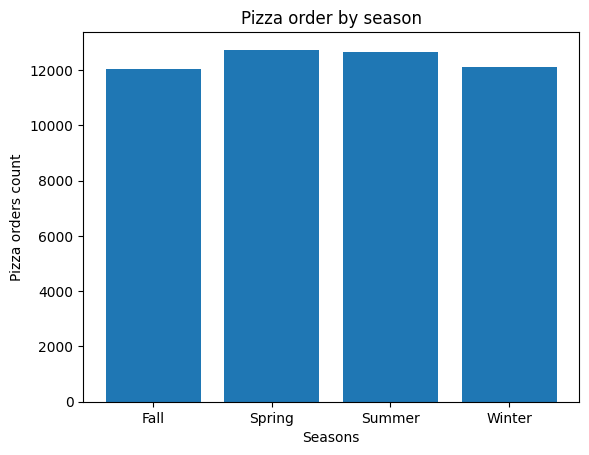

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

seasons_mapping = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['season'] = pd.to_datetime(df['order_date']).dt.month.map(seasons_mapping)

# using size basically compensate df.groupby('season')['quantity'].sum()
seasonal_orders = df.groupby('season').size().reset_index().rename(columns={0: 'quantity'})

plt.bar(seasonal_orders['season'], seasonal_orders['quantity'])
plt.xlabel('Seasons')
plt.ylabel('Pizza orders count')
plt.title('Pizza order by season')
plt.show()


b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
commandes ?

In [74]:
# df['day'] = df['order_date'].dt.dayofweek
# # Correlation insignifiante entre les deux variables
# df['day'].corr(df['day'].size())

In [73]:
# temp_df = df.groupby('day').size().reset_index().rename(columns={0: 'quantity'})
# plt.figure(figsize=(10,6))
# plt.bar(temp_df['day'], temp_df['quantity'])
# plt.title('Yearly amount of pizza sold each day of the week')
# plt.ylabel('Pizzas sold')
# plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.show()


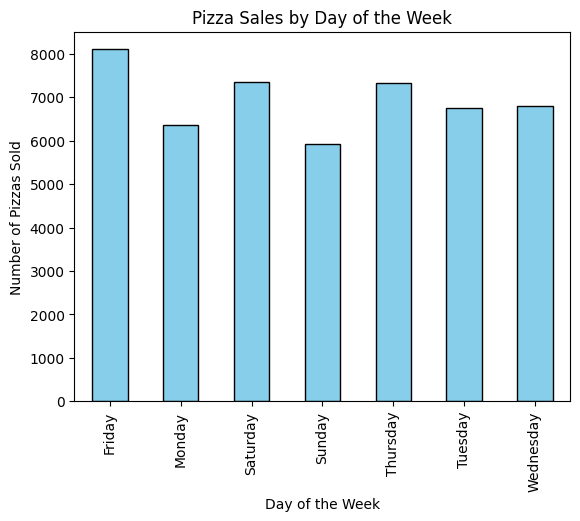

In [75]:
# Assuming df is your DataFrame
# Make sure your 'order_date' column is of type datetime
df['order_date'] = pd.to_datetime(df['order_date'])

df['day_of_week'] = df['order_date'].dt.day_name()


daily_pizza_count = df.groupby('day_of_week').size()

fig, ax = plt.subplots()
daily_pizza_count.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Customize the plot
ax.set_title('Pizza Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Pizzas Sold')

# Show the plot
plt.show()


In [89]:
df['month'] = df['order_date'].dt.month_name()
df.groupby(['month', 'day_of_week']).count()['order_details_id']

month      day_of_week
April      Friday         628
           Monday         577
           Saturday       572
           Sunday         434
           Thursday       690
                         ... 
September  Saturday       579
           Sunday         439
           Thursday       414
           Tuesday        716
           Wednesday      656
Name: order_details_id, Length: 83, dtype: int64

In [93]:
daily_pizza_count.sort_index()

Friday       7323
Monday       8106
Saturday     6753
Sunday       6797
Thursday     5917
Tuesday      6369
Wednesday    7355
dtype: int64

In [87]:
# daily_pizza_count.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

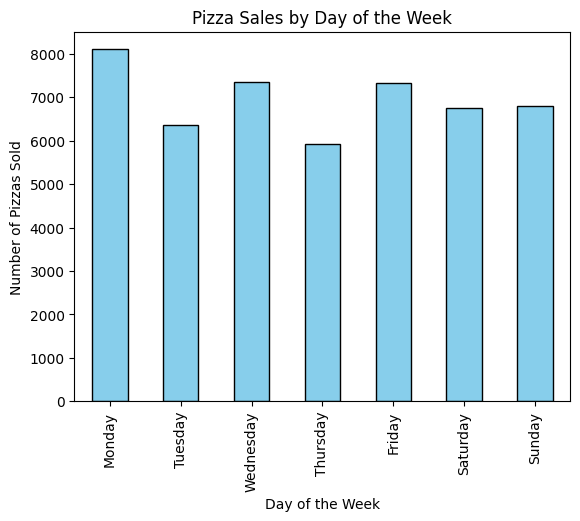

In [94]:
fig, ax = plt.subplots()
#forgot to reorder the days, pretty hard to execute

daily_pizza_count.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

ax.set_title('Pizza Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Pizzas Sold')
plt.show()


# The End

In [ ]:
# !pip freeze > requirements.txt

In [ ]:
# ➔ Quels sont les jours et les heures où nous sommes le plus occupés ?
# df.order_date.apply(lambda x : x.day)

# ➔ Combien de pizzas fabriquons-nous pendant les périodes de pointe ?
# df.order_time.apply(lambda x : np.mean(x))
# ➔ Quelles sont les pizzas les plus vendues et les moins vendues ?

# ➔ Quelle est la valeur moyenne de nos commandes ?
